In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<p>Este Dataset ja está separado em uma parte de treino e uma de teste, porém, a de teste não serve para validação, já que os valores la presentes não são conhecidos pelo dataset. O treinamento, divisão de dados e validação será completamente feito usando os dados de treino</p>

<!DOCTYPE html>
<html lang:"pt">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Campos do DataFrame Titanic</title>
    <style>
        body { font-family: Arial, sans-serif; line-height: 1.6; margin: 20px; }
        h1 { color: #999; }
        table { width: 100%; border-collapse: collapse; margin-top: 20px; }
        th, td { border: 1px solidrgba(0, 0, 0, 0.95); padding: 10px; text-align: left; }
        th { background-color: #f4f4f4; }
    </style>
</head>
<body>
    <h1>Campos do DataFrame Titanic</h1>
    <table>
        <tr>
            <th>Campo</th>
            <th>Descrição</th>
        </tr>
        <tr>
            <td><strong>PassengerId</strong></td>
            <td>Identificador único de cada passageiro.</td>
        </tr>
        <tr>
            <td><strong>Survived</strong></td>
            <td>Indica se o passageiro sobreviveu (1) ou não (0).</td>
        </tr>
        <tr>
            <td><strong>Pclass</strong></td>
            <td>Classe do bilhete do passageiro: 1 = Primeira, 2 = Segunda, 3 = Terceira.</td>
        </tr>
        <tr>
            <td><strong>Name</strong></td>
            <td>Nome completo do passageiro.</td>
        </tr>
        <tr>
            <td><strong>Sex</strong></td>
            <td>Sexo do passageiro (male para masculino, female para feminino).</td>
        </tr>
        <tr>
            <td><strong>Age</strong></td>
            <td>Idade do passageiro em anos. Valores nulos indicam falta de registro.</td>
        </tr>
        <tr>
            <td><strong>SibSp</strong></td>
            <td>Número de irmãos/esposas a bordo com o passageiro.</td>
        </tr>
        <tr>
            <td><strong>Parch</strong></td>
            <td>Número de pais/filhos a bordo com o passageiro.</td>
        </tr>
        <tr>
            <td><strong>Ticket</strong></td>
            <td>Número do bilhete.</td>
        </tr>
        <tr>
            <td><strong>Fare</strong></td>
            <td>Preço da passagem paga pelo passageiro.</td>
        </tr>
        <tr>
            <td><strong>Cabin</strong></td>
            <td>Número da cabine (se disponível). Muitos valores estão ausentes.</td>
        </tr>
        <tr>
            <td><strong>Embarked</strong></td>
            <td>Porto de embarque: C = Cherbourg, Q = Queenstown, S = Southampton.</td>
        </tr>
    </table>

In [6]:
#Importando meu dataset Titanic
Dados_train = pd.read_csv('train_Titanic.csv')
Dados_teste = pd.read_csv('test_Titanic.csv')

In [7]:
Dados_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Dados_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#Variáveis que claramente não são explicativas e não devem ser analisadas, como nome, ticket, cabine e porto de embarque, irei retirar
Nomes_teste = Dados_teste['Name']

Dados_train = Dados_train.drop(columns=['Ticket','Name','Cabin'])
Dados_teste = Dados_teste.drop(columns=['Ticket','Name','Cabin'])

In [10]:
#Transformar o ID de passagem no index
Dados_train.set_index('PassengerId')
Dados_teste.set_index('PassengerId')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [11]:
#Agora preciso transformar as variaveis textuais explicativas em numeros
#Homem = 0, mulher = 1
Dados_train['Sex'] = Dados_train['Sex'].map(lambda x : 0 if x == 'male' else 1)
Dados_teste['Sex'] = Dados_teste['Sex'].map(lambda x : 0 if x == 'male' else 1)


In [12]:
Dados_train['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [13]:
#Entender os valores possíveis de local do embarque
Dados_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
#Entender a distribuição de sobreviventes
Dados_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

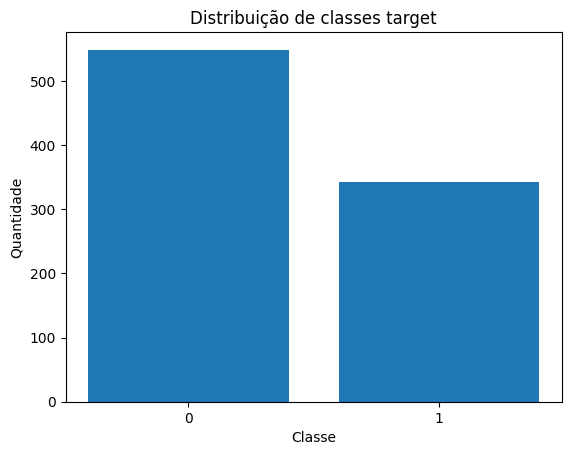

In [15]:
#Grafico de distribuição das variaveis target

#Contagem de cada classe target
unique, contagem = np.unique(Dados_train['Survived'], return_counts = True)

plt.bar(unique, contagem)
plt.title('Distribuição de classes target')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(unique) #Definindo os rotulos do eixo x para cada classe (0 ou 1 nesse caso)

plt.show()

<p>É possível ver que as classes têm um certo <b>desbalanceamento</b> entre si, e isso deve ser considerado na evolução do modelo.</p>

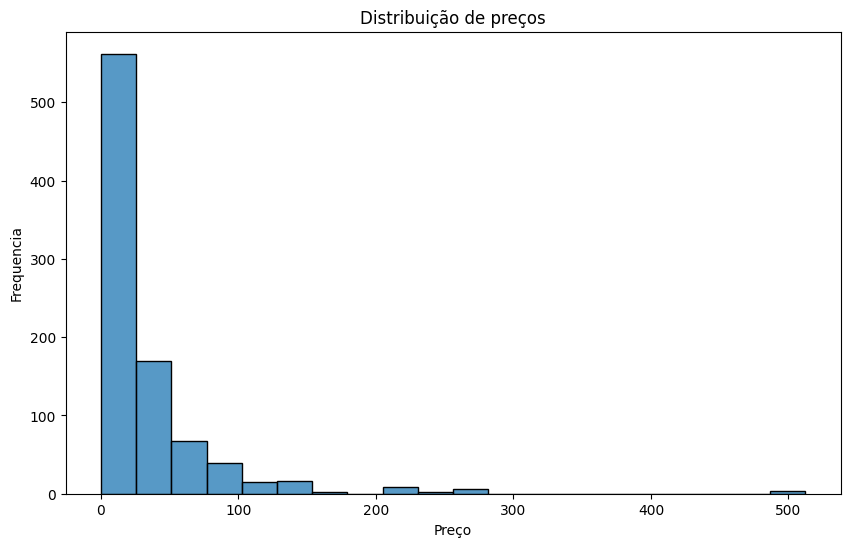

In [16]:
#Entendendo a distribuição de preço pago pelos passageiros 
plt.figure(figsize=(10,6))
sns.histplot(Dados_train['Fare'], kde = False, bins = 20)
plt.title('Distribuição de preços')
plt.xlabel('Preço')
plt.ylabel('Frequencia')

plt.show()

0.2573065223849622


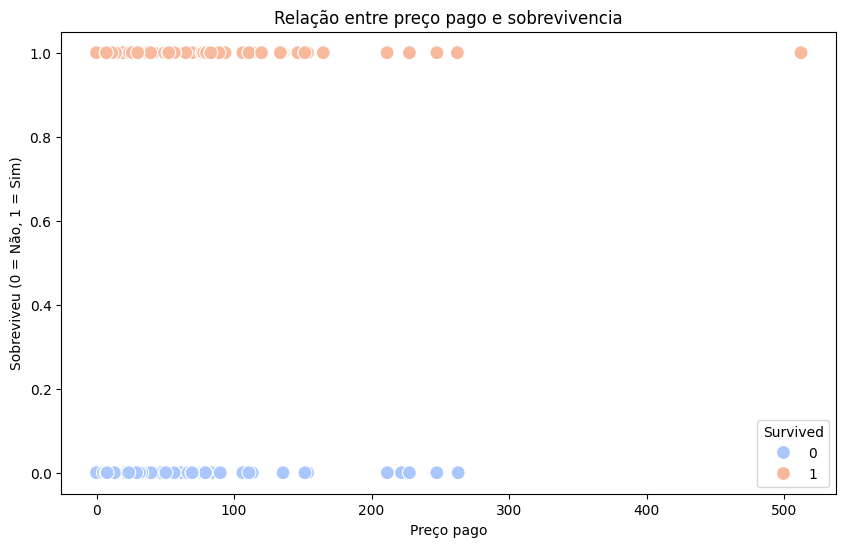

In [ ]:
# Vou ver também se a algum padrão de preço pago em relação à sobrevivência
# A função pointbiserialr é uma versão da correlação de Pearson ajustada à correlação entre variável contínua e binária.
# Poderia também usar Spearman caso a variável Fare não siga uma normal, o que é o caso como visto anteriormente

from scipy.stats import pointbiserialr

corr, p_valor = pointbiserialr(Dados_train['Fare'],Dados_train['Survived'])

print(relacao)

plt.figure(figsize=(10,6))
sns.scatterplot(x = Dados_train['Fare'],
                y = Dados_train['Survived'],
                data = Dados_train,
                hue = Dados_train['Survived'],
                palette='coolwarm',
                s = 100)

plt.title('Relação entre preço pago e sobrevivencia')
plt.xlabel('Preço pago')
plt.ylabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.show()

<p>Pela correlação fraca, não há viés de preço pago em relação a sobrevivencia.</p>

In [ ]:
Dados_train['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [ ]:
#Numerando locais de embarque: S = 1; C = 2; Q = 3

for i in range(len(Dados_train)):
    if Dados_train.loc[i,'Embarked'] == 'S': 
        Dados_train.loc[i,'Embarked'] = 1

    elif Dados_train.loc[i,'Embarked'] == 'C':
        Dados_train.loc[i,'Embarked'] = 2

    elif Dados_train.loc[i,'Embarked'] == 'Q':
        Dados_train.loc[i,'Embarked'] = 3

    else:
        Dados_train.loc[i,'Embarked'] = np.nan


for i in range(len(Dados_teste)):
    if Dados_teste.loc[i,'Embarked'] == 'S': 
        Dados_teste.loc[i,'Embarked'] = 1

    elif Dados_teste.loc[i,'Embarked'] == 'C':
        Dados_teste.loc[i,'Embarked'] = 2

    elif Dados_teste.loc[i,'Embarked'] == 'Q':
        Dados_teste.loc[i,'Embarked'] = 3

    else:
        Dados_teste.loc[i,'Embarked'] = np.nan


In [ ]:
Dados_train['Embarked'].value_counts()

Embarked
1    644
2    168
3     77
Name: count, dtype: int64

In [ ]:
Dados_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


<p>O desafio aqui será prever se um passageiro sobreviveu ou não ao Titanic, baseando-se em dados de pessoas que sabidamente sobreviveram ou não, assim achando padrões e dividindo nossos dados pelas características que melhor as explicam</p>
<p>É um conjunto de dados de classificação (sobreviveu ou não), com multivariáveis que podem ter diferentes importâncias para o modelo. Por isso, para prevê-lo, usarei o Random Forest, a "versão superior" do Decision Tree, que aleatoriamente irá separar conjuntos de dados do meu dataset, e treiná-los usando DecisionTree para cada um, assim decidindo o resultado através de votação daquele que mais apareceu. Além disso, <b>lidará com meu problema de importância de variáveis</b> fazendo cálculo de impureza para cada uma em cada nó das árvores, usando Gini ou Entropia.</p>
<p>Antes de ver o modelo, talvez seja interessante rever alguns conceitos sobre o Random Forest e quais são seus principais hiperparâmetros, o link levará para o site do Scikit-Learn que explica melhor sobre: </p><a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Random Forest - Documentação Scikit-Learn</a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
x = Dados_train.drop(columns=['Survived','PassengerId'])
y = Dados_train['Survived']

x_train, x_test, y_train, y_teste = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
#Definindo melhores parâmetros com GridSearchCV
best_parameters = {
    "n_estimators" : np.arange(10, 50, 10),
    "max_depth" : [3, 6, 9, 12, None],
    "min_samples_split" : np.arange(3,12,3),
    "min_samples_leaf" : np.arange(2,10,2),
    "criterion" : ["gini", "entropy"],
    "max_features": ["sqrt", "log2"],
    "bootstrap" : [True, False]
}

model = RandomForestClassifier()

#Considerando desbalanceamento entre as classes (classe 0 tem 60% a mais que classe 1) usarei um scoring que 
#consiga ponderar melhor o desbalanceamento considerando que ambas classes tem a mesma importancia, o f1_macro
grid_rf_model = GridSearchCV( model, 
                             best_parameters, 
                             cv = 5, 
                             scoring="f1_macro",
                             n_jobs = -1,
                             verbose = 3
    
)

grid_rf_model.fit(x_train, y_train)

melhores_hiperparametros = grid_rf_model.best_params_

print(f'os melhores parâmetros para o modelo são: {melhores_hiperparametros}')

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
os melhores parâmetros para o modelo são: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 10}


In [ ]:
#Monstrando o melhor valor do f1_macro obtido
grid_rf_model.best_score_

0.8184682558507488

<p>A curva ROC compara a taxa de verdadeiros positivos com a taxa de falsos positivos para diferentes <b>thresolds</b> (limiares de probabilidade para distinguir entre as classes)</p>
<p>Ao comparar a taxa de acertos para diferentes thresolds, o ROC nos devolve uma "pontuação", que varia de 0 a 1, e nos mostra o quão bem nosso modelo está distinguinfo entre as classes mesmo que os limiares de probabilidade sejam alterados</p>
<p>A métrica AUC (Área Sob a Curva ROC) mede a capacidade do modelo de distinguir entre as classes. Representa a probabilidade de o modelo classificar um exemplo positivo com maior probabilidade do que um exemplo negativo.</p>


In [ ]:
#Quero usar a curva ROC AUC para avaliar a capacidade do meu modelo de distinguir as classes
y_test = y_teste.to_numpy()

#Aqui, pego a probabilidade que o modelo distingue em cada nó para determinada classe target, baseado em quantos exemplares de cada classe exist no nó
#Farei predict_prova ao invés de predict comum, pois para a curva ROC, preciso pegar probabilidade
y_pred_prob = grid_rf_model.predict_proba(x_test)[:, 1]  # Pegamos apenas a probabilidade da classe positiva

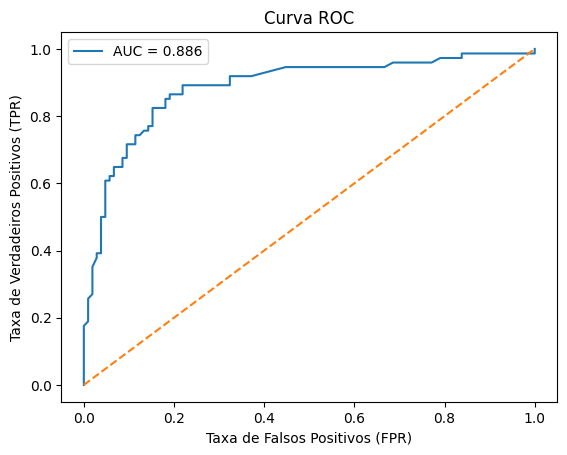

In [ ]:
#Geramos o score da curva ROC
auc_roc = roc_auc_score(y_test,y_pred_prob)

#Geramos os pontos da curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

#Plot da Curva ROC
plt.plot(fpr, tpr, label=f"AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--") 
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

<p>Cada ponto da Curva ROC representa um par (FPR, TPR) obtido ao variar o limiar de decisão do modelo.</p>
<p>O modelo de classificação retorna uma probabilidade para cada amostra ser da classe positiva (1).
Dependendo do limiar de decisão, classificamos uma amostra como 0 ou 1.</p>
<p>
🔹 Se o limiar for alto (ex: 0.9) → O modelo classifica poucas amostras como positivas, reduzindo TPR e FPR.</p>
<p>
🔹 Se o limiar for baixo (ex: 0.2) → O modelo classifica muitas amostras como positivas, aumentando TPR e FPR.</p>
<p>Não há problema em usar apenas o AUC-ROC no meu problema, pois as classes não estão <b>severamente desbalanceadas</b>, mas por precaução, validarei também com a métrica <b>Curva Precision-Recall</b>, que avalia o modelo de classificação com mais enfase em desbalanceamentos</p>

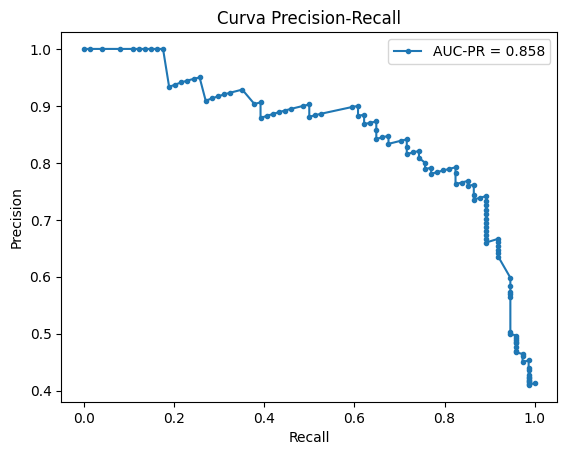

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Calculamos os pontos da Curva PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculamos a AUC-PR
auc_pr = auc(recall, precision)

# Plot da Curva PR
plt.plot(recall, precision, marker='.', label=f'AUC-PR = {auc_pr:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()
plt.show()


# Curva Precision-Recall (PR)

A **Curva Precision-Recall (PR)** é usada para avaliar modelos de classificação, especialmente em problemas com **desbalanceamento de classes**.

## Definições:
- **Precisão (Precision)**: Proporção de positivos previstos que realmente são positivos.  
- **Revocação (Recall)**: Proporção de exemplos positivos corretamente identificados.  

## Interpretação:
- Cada ponto na curva representa um limiar de decisão diferente.
- Quanto mais próxima do **canto superior direito**, melhor o modelo.
- A **Área sob a Curva PR** resume o desempenho em um único valor.

## Quando usar a Curva PR?
- Em **dados desbalanceados**, pois foca na classe positiva.
- Preferível à **Curva ROC** quando a classe negativa é muito mais frequente.



In [ ]:
#Agora, podemos prever usando a base de teste, quantas pessoas sobreviveram com base no treinamento, mas tenho que transformar meus dados que nao transformei anteriormente
Dados_teste = Dados_teste.drop(columns = 'PassengerId')

In [ ]:
Dados_teste = Dados_teste.dropna(subset = 'Age')

In [ ]:
Dados_teste['Survive Predict'] = grid_rf_model.predict(Dados_teste)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Nome
- Survive Predict


In [ ]:
Dados_teste['Nome'] = Nomes_teste

Dados_teste

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survive Predict,Nome
0,3,0,34.5,0,0,7.8292,3,0,"Kelly, Mr. James"
1,3,1,47.0,1,0,7.0000,1,0,"Wilkes, Mrs. James (Ellen Needs)"
2,2,0,62.0,0,0,9.6875,3,0,"Myles, Mr. Thomas Francis"
3,3,0,27.0,0,0,8.6625,1,0,"Wirz, Mr. Albert"
4,3,1,22.0,1,1,12.2875,1,0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
...,...,...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,1,1,"Peacock, Miss. Treasteall"
411,1,1,37.0,1,0,90.0000,3,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)"
412,3,1,28.0,0,0,7.7750,1,0,"Henriksson, Miss. Jenny Lovisa"
414,1,1,39.0,0,0,108.9000,2,1,"Oliva y Ocana, Dona. Fermina"
